In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df=pd.read_csv('Car details v3.csv')

In [3]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


<Axes: >

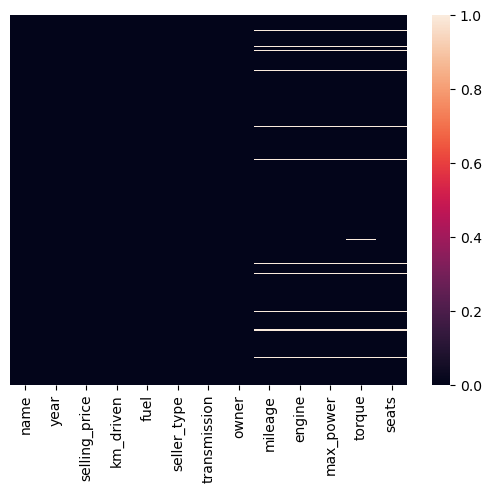

In [4]:
sns.heatmap(df.isnull(), yticklabels=False)

In [5]:
df = df.dropna()  # later we will also find the relation with nan vs price but for now we are removing this
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,7906,7906.000000,7.906000e+03,7.906000e+03,7906,7906,7906,7906,7906,7906,7906,7906,7906.000000
unique,1982,NaN,NaN,NaN,4,3,2,5,393,121,320,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4299,6563,6865,5215,225,1017,377,530,NaN
mean,NaN,2013.983936,6.498137e+05,6.918866e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416393
std,NaN,3.863695,8.135827e+05,5.679230e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959208
min,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2012.000000,2.700000e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.900000e+05,9.542500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
# doing dummy variable in fuel, seller type, transmission
df = pd.get_dummies(df, columns=['fuel'], drop_first=True)
df = pd.get_dummies(df, columns=['seller_type'], drop_first=True)
df = pd.get_dummies(df, columns=['transmission'], drop_first=True)

In [8]:
#replacing owner with 1,2,3,5 so that 1<2<3<5 and our model can understand the weigh of owner matters
df['owner'] = df['owner'].replace(['Test Drive Car','First Owner', 'Second Owner','Third Owner', 'Fourth & Above Owner'], [0,1,2,3,5])
df.head(6)

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,0,0,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,0,0,1,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,0,0,1,1,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,0,0,1,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0,0,1,1,0,1
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,1,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,0,0,1,1,0,1


In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'mileage',
       'engine', 'max_power', 'torque', 'seats', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual'],
      dtype='object')

In [10]:
# remove kmpl, CC, bhp from mileage, engine, max_power
df['mileage'] = df["mileage"].str.replace(" kmpl","")
df['mileage'] = df["mileage"].str.replace(" km/kg","")
df['mileage'] = df['mileage'].astype(float)

In [11]:
df['seats'] = df['seats'].astype(int)

In [12]:
df['engine'] = df["engine"].str.replace(" CC","")
df['engine'] = df['engine'].astype(float)

In [13]:
df['max_power'] = df["max_power"].str.replace(" bhp","")
df['max_power'] = df['max_power'].astype(float)

In [14]:
df

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5,1,0,0,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5,1,0,0,1,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5,0,0,1,1,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5,1,0,0,1,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5,0,0,1,1,0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,5,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,1,0,0,1,0,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5,1,0,0,1,0,1
8126,Tata Indigo CR4,2013,290000,25000,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5,1,0,0,1,0,1


In [15]:
def torque_fxn (torque):
    torque = torque.lower()
    a='@'
    b = 'kgm'
    c1 = '('
    c = 'nm'
    d = '/'
    
    if c in torque:
        torque = torque.split('nm')
        torque = torque[0].strip()
        if a in torque:
            torque = torque.split('@')
            torque = torque[0]
        return (float(torque))

        
    elif b in torque:
        torque = torque.split('kgm')
        torque = torque[0].strip()
            
        if a in torque:
                torque = torque.split('@')
                torque = torque[0]
        return( float(torque)*9.8)
        

            
    elif a in torque:
        torque = torque.split('@')
        torque = torque[0]

        if c1 in torque:
            torque = torque.split('(')

            torque = torque[0].strip()
            return ( float(torque))
        return(float(torque)*9.8)
    elif d in torque:
            torque = torque.split('/')
            torque = torque[0].strip()
            return (float(torque))

In [16]:
df['torque'] = df['torque'].map(torque_fxn)

In [17]:
df

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,1,23.40,1248.0,74.00,190.00,5,1,0,0,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,21.14,1498.0,103.52,250.00,5,1,0,0,1,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,3,17.70,1497.0,78.00,124.46,5,0,0,1,1,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,23.00,1396.0,90.00,219.52,5,1,0,0,1,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,1,16.10,1298.0,88.20,112.70,5,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,18.50,1197.0,82.85,113.70,5,0,0,1,1,0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,5,16.80,1493.0,110.00,235.20,5,1,0,0,1,0,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,19.30,1248.0,73.90,190.00,5,1,0,0,1,0,1
8126,Tata Indigo CR4,2013,290000,25000,1,23.57,1396.0,70.00,140.00,5,1,0,0,1,0,1


In [18]:
df.dtypes

name                             object
year                              int64
selling_price                     int64
km_driven                         int64
owner                             int64
mileage                         float64
engine                          float64
max_power                       float64
torque                          float64
seats                             int64
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
transmission_Manual               uint8
dtype: object

In [19]:
x = df.drop(['selling_price'],axis=1)
y = df[['selling_price']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.04)

In [20]:
print(x_train.shape)
print(x_cv.shape)
print(x_test.shape)

(6071, 15)
(253, 15)
(1582, 15)


In [21]:
# we are vectorizing separately to stop data leakage
vectorizer = CountVectorizer()
vectorizer.fit(x_train['name'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
x_train_name = vectorizer.transform(x_train['name'].values)
x_cv_name = vectorizer.transform(x_cv['name'].values)
x_test_name = vectorizer.transform(x_test['name'].values)

In [22]:
print(x_cv_name.shape)

(253, 718)


In [23]:
x_train_name = pd.DataFrame(x_train_name.toarray(),index=x_train.index.copy())
x_cv_name = pd.DataFrame(x_cv_name.toarray(),index=x_cv.index.copy())
x_test_name = pd.DataFrame(x_test_name.toarray(),index=x_test.index.copy())

In [24]:
print(x_cv_name.shape, x_cv.shape,x_train_name.shape )

(253, 718) (253, 15) (6071, 718)


In [25]:
x_train = x_train.drop(['name'],axis=1)
x_cv = x_cv.drop(['name'],axis=1)
x_test = x_test.drop(['name'],axis=1)
x_cv.shape

(253, 14)

In [26]:
print(x_cv_name.shape, x_cv.shape)

(253, 718) (253, 14)


In [27]:
x_train = pd.concat([x_train, x_train_name], axis=1)
x_cv = pd.concat([x_cv, x_cv_name], axis=1)
x_test = pd.concat([x_test, x_test_name], axis=1)

In [28]:
x_cv

,year,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,...,708,709,710,711,712,713,714,715,716,717
6761,2010,30000,2,21.12,1248.0,88.80,200.00,5,1,0,...,0,0,0,0,0,0,0,0,0,0
8078,2011,100000,2,18.00,995.0,62.00,90.30,5,0,0,...,0,0,0,0,0,0,0,0,0,0
789,2013,120000,1,19.09,1396.0,69.00,135.00,5,1,0,...,0,0,0,0,0,0,0,0,0,0
7123,2014,48000,1,21.70,1498.0,98.96,215.00,5,1,0,...,0,0,0,0,0,0,0,0,0,0
7009,2014,15000,1,20.36,1197.0,78.90,111.80,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,2018,60000,1,21.50,1497.0,108.50,260.00,5,1,0,...,0,0,0,0,0,0,0,0,0,0
6140,2015,49907,1,21.63,998.0,67.04,90.00,5,0,0,...,0,0,0,0,0,0,0,0,0,1
6566,2018,69779,1,22.00,1197.0,81.80,113.00,5,0,0,...,0,0,0,0,0,0,0,0,0,1
2470,2014,110000,2,14.09,1596.0,99.60,146.00,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x_train.to_csv('x_train_final.csv')
x_test.to_csv('x_test.csv')
x_cv.to_csv('x_train_name.csv')

In [30]:
x_train.columns = x_train.columns.astype(str)
x_cv.columns = x_cv.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_array = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_array, index=x_train.index, columns=x_train.columns)
x_array = scaler.transform(x_test)
x_test = pd.DataFrame(x_array, index=x_test.index, columns=x_test.columns)
x_array = scaler.transform(x_cv)
x_cv = pd.DataFrame(x_array, index=x_cv.index, columns=x_test.columns)
df=pd.concat([x_train,y_train])




In [32]:
x_train

,year,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,...,708,709,710,711,712,713,714,715,716,717
1951,0.807692,0.067388,0.2,0.580952,0.166443,0.104058,0.055498,0.250000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2070,0.846154,0.025006,0.2,0.550000,0.125503,0.093246,0.017878,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,0.923077,0.012291,0.2,0.599286,0.058725,0.055828,0.010387,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7050,0.807692,0.052554,0.2,0.309286,0.627517,0.184641,0.063655,0.416667,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7811,0.769231,0.097056,0.2,0.374524,0.451007,0.385430,0.138562,0.250000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,0.807692,0.033482,0.2,0.414286,0.292953,0.230120,0.040766,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,0.884615,0.016953,0.2,0.428571,0.292953,0.230937,0.040766,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3511,0.807692,0.018648,0.2,0.369048,0.192617,0.146786,0.025785,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.884615,0.012291,0.2,0.609524,0.293289,0.177288,0.063655,0.250000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
x_cv

,year,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,...,708,709,710,711,712,713,714,715,716,717
6761,0.615385,0.012291,0.4,0.502857,0.209396,0.152505,0.063655,0.25,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8078,0.653846,0.041959,0.4,0.428571,0.124497,0.079521,0.018003,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
789,0.730769,0.050435,0.2,0.454524,0.259060,0.098584,0.036605,0.25,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7123,0.769231,0.019920,0.2,0.516667,0.293289,0.180174,0.069897,0.25,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7009,0.769231,0.005934,0.2,0.484762,0.192282,0.125545,0.026950,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,0.923077,0.025006,0.2,0.511905,0.292953,0.206155,0.088624,0.25,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6140,0.807692,0.020728,0.2,0.515000,0.125503,0.093246,0.017878,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6566,0.923077,0.029150,0.2,0.523810,0.192282,0.133442,0.027449,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2470,0.769231,0.046197,0.4,0.335476,0.326174,0.181917,0.041183,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
aa

NameError: name 'aa' is not defined

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.callbacks import  EarlyStopping
hidden_units1 = 64
hidden_units2 = 128
hidden_units3 = 64
learning_rate = 0.01
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='he_normal', activation='relu'),

    Dense(hidden_units2, kernel_initializer='he_normal', activation='relu'),

    Dense(hidden_units2, kernel_initializer='he_normal', activation='relu'),

    Dense(hidden_units3, kernel_initializer='he_normal', activation='relu'),
      
#     Dense(64, kernel_initializer='he_normal', activation='relu'),
      
    Dense(1, kernel_initializer='he_normal', activation='linear')

  ])
    
  return model
# build the model
model = build_model_using_sequential()
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=50, 
    batch_size=64,
    validation_data=(x_cv, y_cv),
    callbacks=[early_stopping_callback]
)

In [ ]:
x_train_pred = model.predict(x_train)
x_train_pred = pd.DataFrame(x_train_pred,index=x_train.index.copy())
x_train_pred.columns = ['train_predicted']
x_train_result = pd.concat([y_train, x_train_pred], axis=1)
x_train_result

In [ ]:
from sklearn.metrics import r2_score
y_true = x_train_result['selling_price']
y_pred = x_train_result['train_predicted']
r2_score(y_true, y_pred) # training r2 score

In [ ]:
y_pred10 = model.predict(x_test)
x_test_result = pd.DataFrame(y_pred10,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

In [ ]:
from sklearn.metrics import r2_score
y_true = x_test_result.selling_price
y_pred = x_test_result.predicted
r2_score(y_true, y_pred) # test r2 score

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, metrics
model = LinearRegression()
# train the model using the training sets
model.fit(x_train, y_train)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test))) 

In [ ]:
# this model is corrected by lasso regression
a = [0,.01,.1,1.5,10,12,15,20,25,28,30,40,50,75,100,200,500]
for i in a:
    model = Lasso(alpha=i)
    model.fit(x_train, y_train)
    y_pred1 = model.predict(x_test)
    print(f'{i}  Variance score or r_sq: {model.score(x_test, y_test)}')


In [ ]:
model = Lasso(alpha=25)
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
print(f'Variance score or r_sq: {model.score(x_test, y_test)}')

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Create the SGDRegressor model
model = SGDRegressor()

# Define the hyperparameters you want to tune
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1,1],
    'l1_ratio': [0.2, 0.4, 0.6, 0.8],
    'max_iter': [1000, 2000, 3000],
}

# Create a scorer using r2_score
scorer = make_scorer(r2_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, parameters, scoring=scorer, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Make predictions using the best model
y_pred2 = best_model.predict(x_test)

print('Best hyperparameters:', grid_search.best_params_)
print('Best variance score (r2):', best_score)


In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(alpha= 0.0001, l1_ratio= 0.2, max_iter= 3000)
model.fit(x_train, y_train)
y_pred2 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

In [ ]:
x_test_result = pd.DataFrame(y_pred2,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Create the SVR model
model = SVR()

# Define the hyperparameters you want to tune
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1,5, 10],
    'epsilon': [0.1, 0.2, 0.5],
}

# Create a scorer using r2_score
scorer = make_scorer(r2_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, parameters, scoring=scorer, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Make predictions using the best model
y_pred4 = best_model.predict(x_test)

print('Best hyperparameters:', grid_search.best_params_)
print('Best variance score (r2):', best_score)


In [ ]:

# svm fails to perform
from sklearn.svm import SVR
model = SVR()
model.fit(x_train,y_train)
y_pred4 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))


In [ ]:
x_test_result = pd.DataFrame(y_pred4,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

In [ ]:
from sklearn.metrics import r2_score
y_true = x_test_result['selling_price']
y_pred = x_test_result['predicted']
r2_score(y_true, y_pred)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Create the ExtraTreesRegressor model
model = ExtraTreesRegressor()

# Define the hyperparameters you want to tune
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6],
}

# Create a scorer using r2_score
scorer = make_scorer(r2_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, parameters, scoring=scorer, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Make predictions using the best model
y_pred9 = best_model.predict(x_test)

print('Best hyperparameters:', grid_search.best_params_)
print('Best variance score (r2):', best_score)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_train,y_train)
y_pred9 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

x_test_result = pd.DataFrame(y_pred9,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a regressor object
model = DecisionTreeRegressor(random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Calculate the variance score (R^2) of the best model on the test set
score = best_model.score(x_test, y_test)
print('Variance score (R^2): {}'.format(score))

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
model = DecisionTreeRegressor(random_state = 0)
model.fit(x_train,y_train)
y_pred5 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the classifier object
model = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Calculate the accuracy score of the best model on the test set
score = best_model.score(x_test, y_test)
print('Accuracy score: {}'.format(score))

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)


In [ ]:
# this classifier is not performing well
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)
model.fit(x_train,y_train)
y_pred5 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

In [ ]:
x_test_result = pd.DataFrame(y_pred5,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

In [ ]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV

# Create the regressor object
model = xg.XGBRegressor()

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,n_jobs = -1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Calculate the variance score (R^2) of the best model on the test set
score = best_model.score(x_test, y_test)
print('Variance score (R^2): {}'.format(score))

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

In [ ]:
print('Best hyperparameters:', best_params)

In [ ]:
import xgboost as xg
model = xg.XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 5, n_estimators=1000, subsample= 0.8)
model.fit(x_train,y_train)
y_pred6 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

In [ ]:
x_test_result = pd.DataFrame(y_pred6,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create the base estimator
base_estimator = DecisionTreeRegressor()

# Create the AdaBoostRegressor
model = AdaBoostRegressor(base_estimator=base_estimator, random_state=1)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs =-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Calculate the variance score (R^2) of the best model on the test set
score = best_model.score(x_test, y_test)
print('Variance score (R^2): {}'.format(score))

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)


/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/prayer/anaconda3/lib/python3.10/sit

/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/prayer/anaconda3/lib/python3.10/sit

/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prayer/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/prayer/anaconda3/lib/python3.10/sit

Variance score (R^2): 0.977740930911424
Best hyperparameters: {'learning_rate': 0.001, 'n_estimators': 200}


In [36]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.001, loss='linear', n_estimators=200, random_state=1)
model.fit(x_train, y_train)
y_pred6 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(r2_score(y_test, y_pred6)))


Variance score or r_sq: 0.977740930911424


In [37]:
x_test_result = pd.DataFrame(y_pred6,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
6156,160000,160000.0
5930,385000,430000.0
8046,525000,700000.0
1009,425000,250000.0
2144,345000,520000.0
...,...,...
6088,329000,329000.0
7714,475000,425000.0
3326,525000,561000.0
6525,1282000,1282000.0


In [38]:
from sklearn.neighbors import KNeighborsRegressor
for K in range(1,30):
    
    model = KNeighborsRegressor(n_neighbors = K)
    K = K+1
    model.fit(x_train,y_train)
    y_pred7 = model.predict(x_test)
    print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))
    
#we see that k=1 is best
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(x_train,y_train)
y_pred_knn = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))


print('*'*100)
x_test_result = pd.DataFrame(y_pred_knn,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

Variance score or r_sq: 0.9514242635610783
Variance score or r_sq: 0.9142566486564867
Variance score or r_sq: 0.8964747447399439
Variance score or r_sq: 0.883836433787271
Variance score or r_sq: 0.8849200491542241
Variance score or r_sq: 0.8765890294664984
Variance score or r_sq: 0.8707788674580781
Variance score or r_sq: 0.8652225527794565
Variance score or r_sq: 0.8558070538664233
Variance score or r_sq: 0.8499795659884156
Variance score or r_sq: 0.8462524026782766
Variance score or r_sq: 0.8469016580794015
Variance score or r_sq: 0.8491224335087255
Variance score or r_sq: 0.8513244810480505
Variance score or r_sq: 0.8531115322115783
Variance score or r_sq: 0.8539328317819393
Variance score or r_sq: 0.8561072960533039
Variance score or r_sq: 0.8569955288034959
Variance score or r_sq: 0.8575695810260069
Variance score or r_sq: 0.8574743293465198
Variance score or r_sq: 0.8561521391313665
Variance score or r_sq: 0.8542048438762946
Variance score or r_sq: 0.8528885733272596
Variance sco

,selling_price,predicted
6156,160000,150000.0
5930,385000,393000.0
8046,525000,587500.0
1009,425000,287500.0
2144,345000,570000.0
...,...,...
6088,329000,329500.0
7714,475000,552500.0
3326,525000,505500.0
6525,1282000,1403500.0


In [39]:
model = KNeighborsRegressor(n_neighbors = 1)

model.fit(x_train,y_train)
y_pred7 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

Variance score or r_sq: 0.9514242635610783
